In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
#base_dir = "toy_eg_stage1_"#
base_dir = "proportional/toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
new_order = ['Naive', 1.0, 2.0, 3.0, 4.0, 5.0, 'Tree val']
coverage_df = coverage_df[new_order]
coverage_df

,Naive,1.0,2.0,3.0,4.0,5.0,Tree val
0,0.666667,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333
1,0.833333,1.000000,1.000000,0.833333,0.833333,0.833333,1.000000
2,0.666667,0.833333,0.833333,1.000000,1.000000,0.833333,0.833333
3,0.500000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000
4,0.800000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...
45,0.333333,0.833333,1.000000,0.833333,1.000000,0.833333,0.666667
46,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333
47,0.666667,1.000000,0.833333,0.833333,0.833333,0.833333,0.833333
48,0.714286,1.000000,1.000000,0.857143,0.833333,0.833333,1.000000


In [5]:

length_df = length_df[new_order]
length_df

,Naive,1.0,2.0,3.0,4.0,5.0,Tree val
0,6.579415,12.380846,8.657289,8.327450,8.282793,7.733723,60.749166
1,6.579415,19.741286,8.592650,7.573650,7.060243,7.807971,36.844095
2,6.579415,12.297042,9.650113,8.807083,8.046593,7.624940,9.252830
3,6.579415,11.348762,8.136565,7.809576,7.869037,7.546805,24.647254
4,6.579415,11.025444,8.791417,7.828406,7.257114,7.330252,22.230015
...,...,...,...,...,...,...,...
45,6.579415,14.016411,9.642782,8.217240,7.734953,7.223814,53.064086
46,6.579415,12.552003,8.984919,8.288639,7.593531,7.892059,69.371795
47,6.579415,11.591861,8.583207,6.910379,6.887567,7.024918,58.406027
48,6.579415,11.762870,8.164739,8.230936,7.545070,7.168650,22.504188


In [6]:
MSE_df = MSE_df[new_order]
MSE_df

,Naive,1.0,2.0,3.0,4.0,5.0,Tree val
0,4.763445,5.099341,4.691955,4.867183,4.959065,4.754177,4.763445
1,4.268548,4.594842,4.729468,4.967753,4.975835,4.629943,4.268548
2,4.806279,4.720261,4.637741,5.232672,5.254416,5.576361,4.806279
3,5.451172,5.251753,5.195973,5.636161,5.036596,4.977450,5.451172
4,3.815103,3.949075,4.084792,4.031705,4.465846,4.310825,3.815103
...,...,...,...,...,...,...,...
45,4.145074,4.176868,4.364989,5.121384,4.978859,6.084448,4.145074
46,4.089269,4.246645,3.893309,4.325186,4.471728,4.998882,4.089269
47,4.259059,4.496030,4.541523,4.651673,4.743682,4.771425,4.259059
48,4.408939,4.809643,4.570895,4.558829,4.488186,5.135806,4.408939


In [7]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        showmeans = False# if metric == "Coverage" else True
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, 
                    showmeans=showmeans)
        axes[i].set_title(f'{metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        new_label = [x if x != "Naive" else r"Naïve" for x in col_names]
        axes[i].set_xticklabels(new_label)
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10,)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,8)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=1)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_96663/2376793280.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_96663/2376793280.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_96663/2376793280.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)


Coverage :
 Naive          0.665848
RRT(1)         0.890638
RRT(2)         0.883876
RRT(3)         0.899476
RRT(4)         0.902838
RRT(5)         0.898343
Tree-values    0.894933
dtype: float64
Length :
 Naive           6.579415
RRT(1)         12.942525
RRT(2)          9.157385
RRT(3)          8.123121
RRT(4)          7.710564
RRT(5)          7.475295
Tree-values    96.822671
dtype: float64
MSE :
 Naive          4.690624
RRT(1)         4.716243
RRT(2)         4.810283
RRT(3)         4.937588
RRT(4)         5.046731
RRT(5)         5.113635
Tree-values    4.690624
dtype: float64


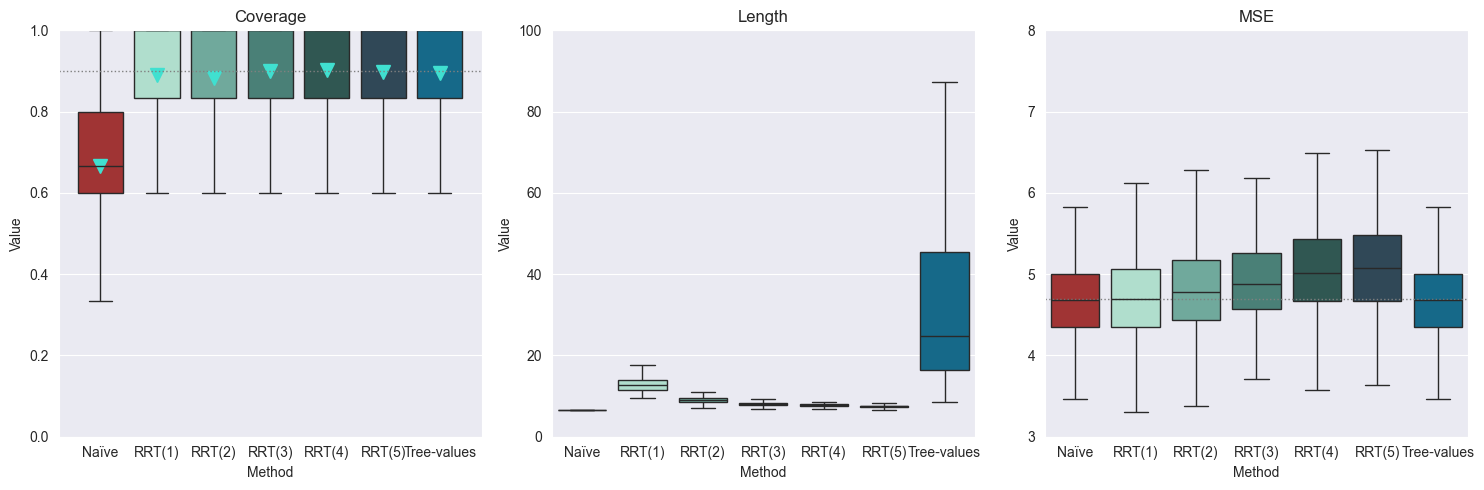

In [8]:

boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=100,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2)", "RRT(3)", "RRT(4)", 
                    "RRT(5)", "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#03719c"])

In [9]:
length_df

,Naive,1.0,2.0,3.0,4.0,5.0,Tree val
0,6.579415,12.380846,8.657289,8.327450,8.282793,7.733723,60.749166
1,6.579415,19.741286,8.592650,7.573650,7.060243,7.807971,36.844095
2,6.579415,12.297042,9.650113,8.807083,8.046593,7.624940,9.252830
3,6.579415,11.348762,8.136565,7.809576,7.869037,7.546805,24.647254
4,6.579415,11.025444,8.791417,7.828406,7.257114,7.330252,22.230015
...,...,...,...,...,...,...,...
45,6.579415,14.016411,9.642782,8.217240,7.734953,7.223814,53.064086
46,6.579415,12.552003,8.984919,8.288639,7.593531,7.892059,69.371795
47,6.579415,11.591861,8.583207,6.910379,6.887567,7.024918,58.406027
48,6.579415,11.762870,8.164739,8.230936,7.545070,7.168650,22.504188


In [13]:
for i, e in enumerate(zip([coverage_df, 
              length_df, 
              MSE_df],
        ["Coverage", "Length", "MSE"])):
    print(i)
    print(e)

0
(       Naive       1.0       2.0       3.0       4.0       5.0  Tree val
0   0.666667  1.000000  1.000000  1.000000  0.833333  1.000000  0.833333
1   0.833333  1.000000  1.000000  0.833333  0.833333  0.833333  1.000000
2   0.666667  0.833333  0.833333  1.000000  1.000000  0.833333  0.833333
3   0.500000  1.000000  1.000000  1.000000  0.666667  1.000000  1.000000
4   0.800000  0.800000  1.000000  1.000000  1.000000  1.000000  1.000000
..       ...       ...       ...       ...       ...       ...       ...
45  0.333333  0.833333  1.000000  0.833333  1.000000  0.833333  0.666667
46  0.666667  1.000000  1.000000  1.000000  1.000000  1.000000  0.833333
47  0.666667  1.000000  0.833333  0.833333  0.833333  0.833333  0.833333
48  0.714286  1.000000  1.000000  0.857143  0.833333  0.833333  1.000000
49  0.833333  0.333333  0.571429  0.857143  1.000000  0.833333  1.000000

[500 rows x 7 columns], 'Coverage')
1
(       Naive        1.0       2.0       3.0       4.0       5.0   Tree val
0   6.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

def boxplots_ratio(dfs, metrics, len_lim=2.0, MSE_lim=10, 
             len_baseline_key="Tree-values", MSE_baseline_key=None,
             col_names=None, palette=None):
    """
    If metric == "Length", plot length ratios:
      ratio = length(RRT(k)) / length(Tree-values), k=1..5
    Only RRT(1)..RRT(5) are shown in that panel; Tree-values is the denominator.
    """
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        # Apply optional column renaming for readability
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        
        # Prepare labels (and handle the "Naïve" accent nicely)
        display_cols = list(df.columns)
        display_labels = [x if x != "Naive" else r"Naïve" for x in display_cols]

        # By default, plot the dataframe as-is
        plot_df = df.copy()
        ylabel = 'Value'
        y_min, y_max = None, None
        showmeans = False  # keep means triangles only for Coverage below

        if metric == "Length":
            # Identify baseline column and RRT(1)..RRT(5) columns
            if len_baseline_key not in df.columns:
                raise ValueError(f'Baseline column "{len_baseline_key}" not found in columns: {list(df.columns)}')

            # Grab RRT(1)..RRT(5) by pattern
            rrt_cols = [c for c in df.columns if re.match(r"^RRT\(\d+\)$", c)]
            # If you only want the first 5, sort by the number and keep first five
            rrt_cols_sorted = sorted(rrt_cols, key=lambda x: int(re.findall(r"\d+", x)[0]))[:5]
            if not rrt_cols_sorted:
                raise ValueError("No RRT(k) columns like 'RRT(1)', 'RRT(2)', ... were found.")

            # Compute ratios vs Tree-values
            baseline = df[len_baseline_key]
            plot_df = df[rrt_cols_sorted].div(baseline, axis=0)

            # Update labels/axes for the ratio plot
            display_cols = rrt_cols_sorted
            display_labels = rrt_cols_sorted  # keep as-is (e.g., RRT(1), …, RRT(5))
            ylabel = r'RRT($\tau$)' + f' / {len_baseline_key}'
            y_min, y_max = 0, 1.75  # interpret len_lim as a ratio limit now

        # Draw the boxplot
        sns.boxplot(data=plot_df[display_cols], ax=axes[i], palette=palette if metric != 'Length' else palette[1:], showfliers=False, showmeans=showmeans)
        if metric != "Length":
            axes[i].set_title(f'{metric}')
        else:
            axes[i].set_title("Ratio fo Length Ralative to Tree-values")
        
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel(ylabel)
        axes[i].set_xticklabels(display_labels)

        # Means (triangles) only for Coverage
        if metric == "Coverage":
            means = df.mean()
            print(metric, ":\n", means.T)
            for j, mean in enumerate(means):
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)
            axes[i].set_ylim(0, 1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)

        elif metric == "Length":
            # Show printed means for transparency (on ratios)
            means = plot_df[display_cols].mean()
            print(metric, " (ratios vs {}):\n".format(len_baseline_key), means.T)
            if y_min is not None and y_max is not None:
                axes[i].set_ylim(y_min, y_max)
            axes[i].axhline(y=1, linestyle='dotted', color='grey', linewidth=1)

        elif metric == "MSE":
            axes[i].set_ylim(3, 7 if MSE_lim is None else MSE_lim)
            means = df.mean()
            print(metric, ":\n", means.T)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey', linewidth=1)

    plt.tight_layout()
    plt.show()


/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_96663/4246671068.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(display_labels)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_96663/4246671068.py:55: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.boxplot(data=plot_df[display_cols], ax=axes[i], palette=palette if metric != 'Length' else palette[1:], showfliers=False, showmeans=showmeans)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_96663/4246671068.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(display_labels)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_96663/4246671068.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. 

Coverage :
 Naive          0.665848
RRT(1)         0.890638
RRT(2)         0.883876
RRT(3)         0.899476
RRT(4)         0.902838
RRT(5)         0.898343
Tree-values    0.894933
dtype: float64
Length  (ratios vs Tree-values):
 RRT(1)    0.567239
RRT(2)    0.400610
RRT(3)    0.354987
RRT(4)    0.336620
RRT(5)    0.325882
dtype: float64
MSE :
 Naive          4.690624
RRT(1)         4.716243
RRT(2)         4.810283
RRT(3)         4.937588
RRT(4)         5.046731
RRT(5)         5.113635
Tree-values    4.690624
dtype: float64


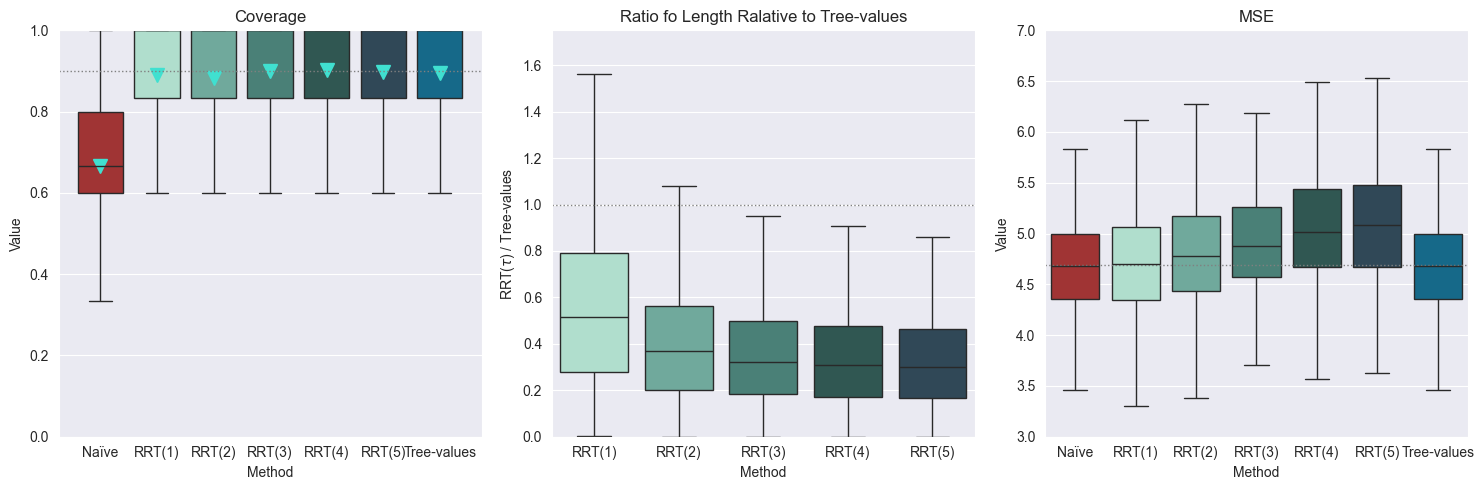

In [42]:
boxplots_ratio(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=100,
         len_baseline_key="Tree-values",
         MSE_baseline_key="Naive",
               MSE_lim=7,
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2)", "RRT(3)", "RRT(4)", 
                    "RRT(5)", "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#03719c"])